Visualization Warmup

1. Copy the following code into a jupyter notebook named visualization_warmup.ipynb

    - import matplotlib as mpl
    - import matplotlib.pyplot as plt
    - import pandas as pd
    - import numpy as np

url = 'https://gist.githubusercontent.com/zgulde/018f5d601efc79cb741a7aba92f51d29/raw/c08f1c09f605b43e9a354890f9dd68f296e76dc4/students.csv'
df = pd.read_csv(url)

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [37]:
url = 'https://gist.githubusercontent.com/zgulde/018f5d601efc79cb741a7aba92f51d29/raw/c08f1c09f605b43e9a354890f9dd68f296e76dc4/students.csv' 
df = pd.read_csv(url)

2. df contains (fake) data on students time at codeup:

    - ml_coffee: coffee consumption in milliliters
    - syntax_errors: number of syntax errors
    - p_days_absent: percentage of days absent

In [3]:
df

,ml_coffee,syntax_errors,p_days_absent
0,16225,5.071306e+10,0.038821
1,18230,5.199823e+10,0.022748
2,15877,5.072630e+10,0.036627
3,8263,4.907919e+10,0.041293
4,13935,5.145114e+10,0.081544
...,...,...,...
95,12065,5.094917e+10,0.038186
96,10135,4.985129e+10,0.078423
97,4497,4.914074e+10,0.042588
98,17863,5.148034e+10,0.085831


3. Create a scatter plot of syntax_errors and ml_coffee. Make sure to give your visual an appropriate title and labels.

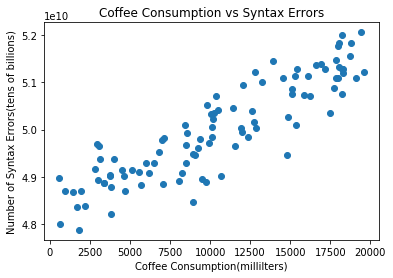

In [15]:
plt.scatter(data = df, x = 'ml_coffee', y = 'syntax_errors')
plt.xlabel('Coffee Consumption(millilters)')
plt.ylabel('Number of Syntax Errors(tens of billions)')
plt.title('Coffee Consumption vs Syntax Errors')
plt.show()

4. Create a scatter plot of p_days_absent and ml_coffee. Make sure to give your visual an appropriate title and labels.

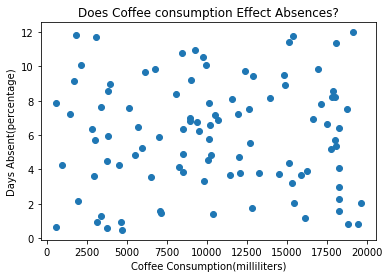

In [14]:
plt.scatter(data= df, x = 'ml_coffee', y = 'p_days_absent')
plt.xlabel('Coffee Consumption(milliliters)')
plt.ylabel('Days Absent(percentage)')
plt.title('Does Coffee Consumption Effect Absences?')
plt.show()

5. Perform any other customizations you think will help to the plots you have created

In [16]:
import seaborn as sns

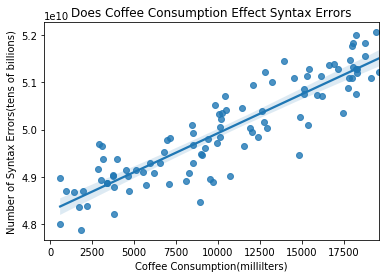

In [20]:
sns.regplot(data = df, x = 'ml_coffee', y = 'syntax_errors')
plt.xlabel('Coffee Consumption(millilters)')
plt.ylabel('Number of Syntax Errors(tens of billions)')
plt.title('Does Coffee Consumption Effect Syntax Errors')
plt.show()

# alternate solutions

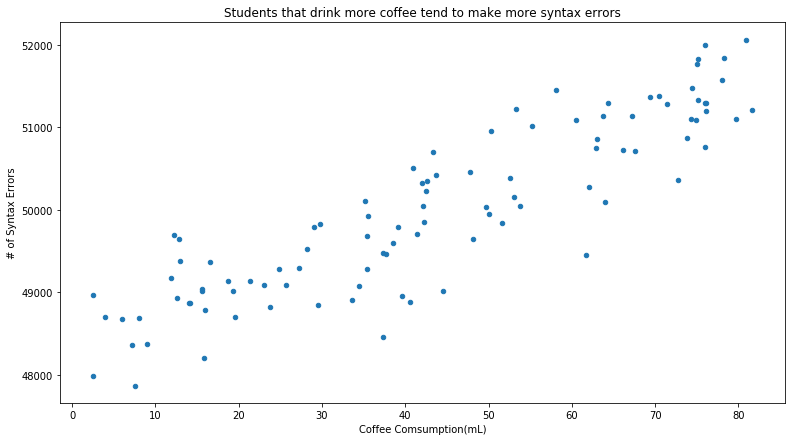

In [29]:
ax = df.plot.scatter(x = 'cups_coffee', y = 'syntax_errors_billions', figsize = (13,7))
ax.set(
    xlabel = 'Coffee Comsumption(mL)',
    ylabel = '# of Syntax Errors(billions)',
    title = 'Students that drink more coffee tend to make more syntax errors'
)
plt.show()

In [28]:
df['syntax_errors_billions'] = df.syntax_errors / 1_000_000
df['cups_coffee'] = df.ml_coffee / 30 / 8

In [41]:
def format_y_tick(tick_value, position):
    return '{:.0%}'.format(tick_value)

def format_x_tick(tick_value, postion):
    return '{:,}'.format(int(tick_value))

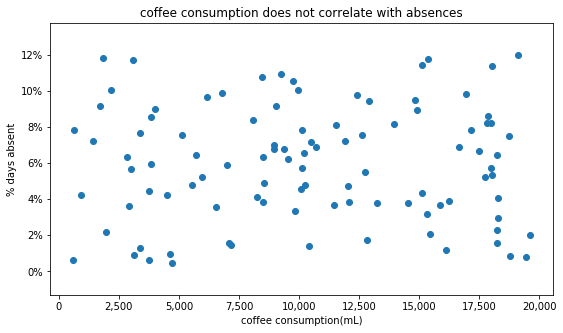

In [42]:
fig, ax = plt.subplots(figsize = (9,5))

ax.scatter(df.ml_coffee, df.p_days_absent)
ax.set(
    xlabel = 'coffee consumption(mL)',
    ylabel = '% days absent',
    title = 'coffee consumption does not correlate with absences'
)
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(format_y_tick))
ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(format_x_tick))
plt.show()

In [43]:
ax.get_xticks()

array([-2500.,     0.,  2500.,  5000.,  7500., 10000., 12500., 15000.,
       17500., 20000., 22500.])

How to handle number presentation on x and y axis:
- domain-based scaling:e.g. divide by 1,000,000 and label as billions, converting mL to cups
- a customfunction + `mpl.ticker.FuncFormatter`
- `ax.get_xticks()` + `ax.set_xticks()`